# Análise Exploratória

Neste primeiro notebook do projeto, será feita uma investigação superficial sobre os dados habitacionais de Boston, sendo fornecidas as observações. Familiarizar-se com os dados por meio de um processo exploratório é uma prática fundamental para nos ajudar a entender e justificar melhor nossos resultados.

Uma vez que o objetivo principal deste projeto é construir um modelo que tenha a capacidade de prever o valor das casas, esse dataset será separado em 'features'(características) e variável 'target'(alvo/objetivo). A variável target, 'MEDV', será a variável que buscamos predizer.

# 0 - Importando bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random

from sklearn.datasets import load_boston
from sklearn import preprocessing
from scipy import stats

warnings.filterwarnings('ignore')

plt.style.use('seaborn-pastel')

%matplotlib inline

# 1 - Importando dados

In [3]:
data = load_boston()

In [4]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
matrix = data['data']
target = data['target']
features = data['feature_names']

In [4]:
df = pd.DataFrame(data = matrix, columns = features)
df['price'] = target

## Resumo dos dados

In [5]:
df.shape

(506, 14)

In [6]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
price      float64
dtype: object

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Imputando missings

Como os dados foram obtidos direto do sklearn, não possuem missings. Portanto, vamos adicionar aleatoriamente alguns dados missings para aumentar um pouco a complexidade da base.

In [9]:
def generate_random_missings(df, target, number_of_columns=5):
    for _ in range(number_of_columns):
        col = random.choice(df.columns)
        if col == target:
            pass
        else:
            frac = random.uniform(0, 0.4)
            df.loc[df.sample(frac=frac).index, col] = pd.np.nan
    return df

In [10]:
np.random.seed(0)
df = generate_random_missings(df, target = 'price', number_of_columns=5)

In [11]:
df.isnull().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX        138
RM          85
AGE          0
DIS          0
RAD        168
TAX         85
PTRATIO      0
B            0
LSTAT        0
price        0
dtype: int64

# 2 - Análise Exploratória

## 2.1 Descrição estatística das variáveis

In [12]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,368.000000,421.000000,506.000000,506.000000,338.000000,421.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.555271,6.317551,68.574901,3.795043,9.535503,406.719715,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.117257,0.704321,28.148861,2.105710,8.768042,167.144284,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.453000,5.905000,45.025000,2.100175,4.000000,280.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.226000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.631000,6.655000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Observações:
- A variável ZN (proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados) apresenta 0 para os percentis 25 e 50;
- CHAS (Charles River) é uma variável dummy (1 = próximo ao rio charles, 0 = não está próximo), esse tipo de visualização não é o mais indicado para avaliar a variável nesse caso.

- Valor máximo da coluna price: a variável parece estar restrita a 50.00 (correspondendo à média de preço de $50,000). Baseado nisso, valores acima de 50.00 podem não ser úteis para predizer o price.

## 2.2 Análise Univariada

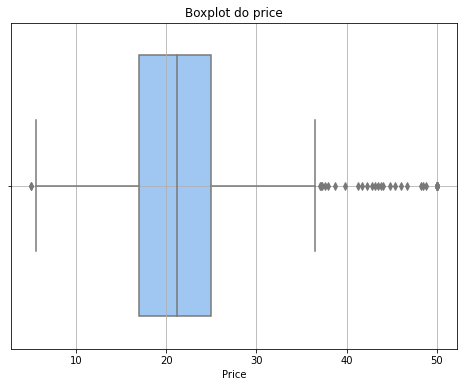

In [13]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(df['price'])
plt.grid()
plt.xlabel('Price')
#plt.ylabel('')
plt.title('Boxplot do price');

## Boxplots das variáveis

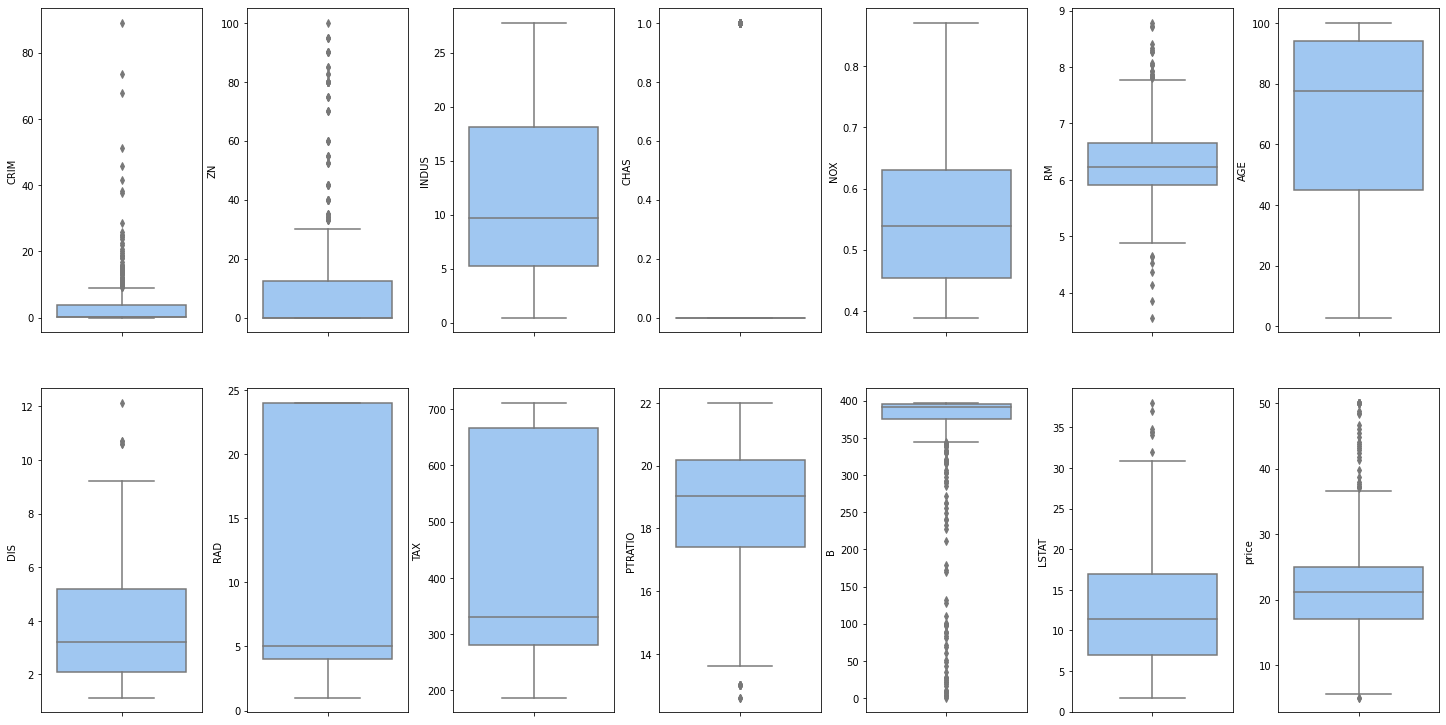

In [14]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for col in df.columns:
    sns.boxplot(y=col, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

As colunas CRIM, ZN, RM, B apresentam outliers. Observando a porcentagem de outliers em cada coluna temos:

In [15]:
for col in df.columns:
    if col == "CHAS":
        pass
    else:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        irq = q3 - q1
        outliers = df[col][(df[col] <= q1 - 1.5 * irq) | (df[col] >= q3 + 1.5 * irq)]
        perc = np.shape(outliers)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (col, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.14%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column price outliers = 7.91%


## 2.3 Distribuição (Histogramas)

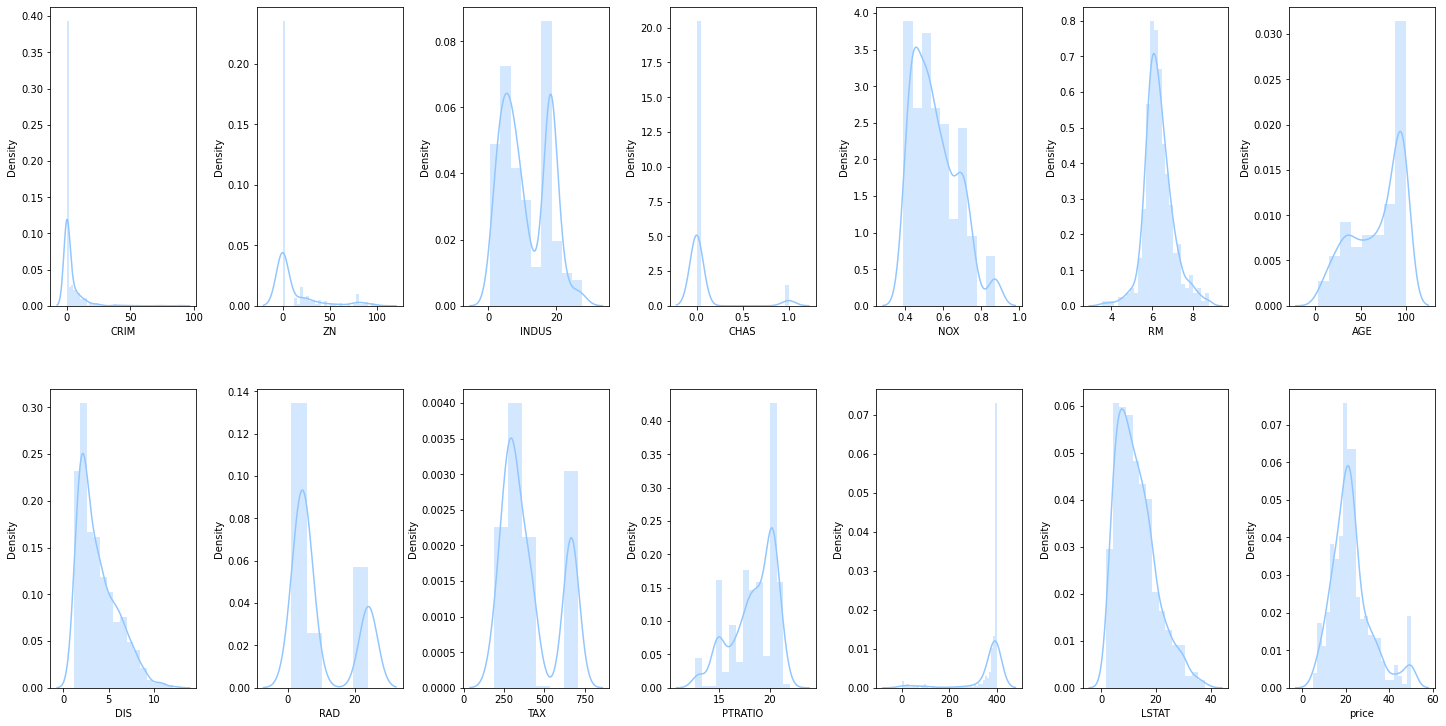

In [16]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for col in df.columns:
    sns.distplot(df[col], ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Pontos interessantes:

- A variável preço parece ter uma distribuição normal;
- Algumas variáveis não parecem obedecer uma distribuição normal (CRIM, ZN, AGE e B);
- As variáveis RAD e TAX apresentam uma distribuição bimodal (RAD e TAX);
- Lembrar que CHAS é uma variável discreta (0 ou 1);
- variáveis que parecem ter relevância para o modelo: 'RM', 'LSTAT', 'PTRATIO' 
    - parecem acompanhar as variações em price (confirmar na análise bivariada).

## 2.4 Análise Bivariada

### Plotando as colunas com maior relevância

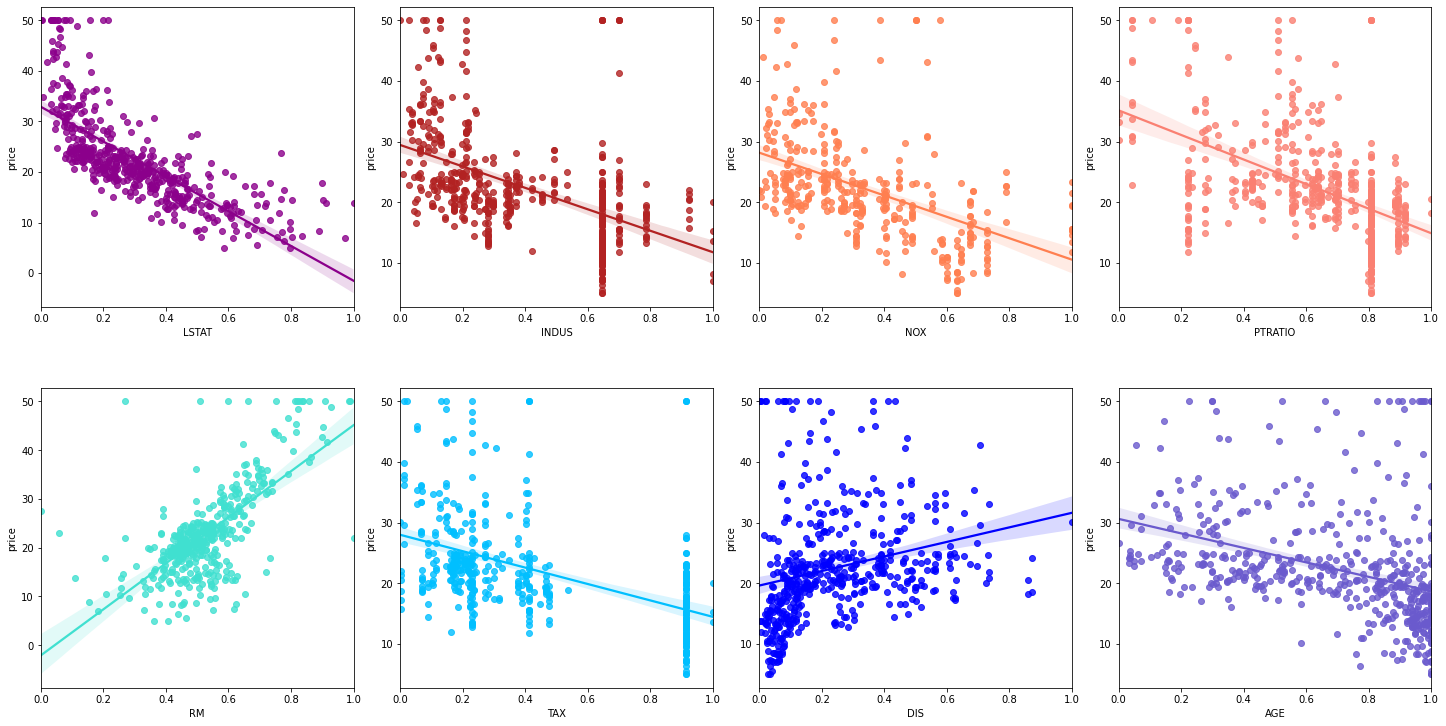

In [17]:
# Dimensionando as colunas antes de plotar com price
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = df.loc[:, column_sels]
y = df['price']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)

fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()

dicionario_cores = {
    0:'darkmagenta', 
    1:'firebrick', 
    2:'coral',
    3:'salmon',
    4:'turquoise',
    5:'deepskyblue',
    6:'blue',
    7:'slateblue'
}

for i, col in enumerate(column_sels):
    sns.regplot(y=y, x=x[col], ax=axs[i], color=dicionario_cores[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Podemos analisar que price aumenta com RM e diminui com PTRATIO e LSTAT.
As features que mais apresentam correlação com price são: 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS' e 'AGE'

## 2.5 Correlações

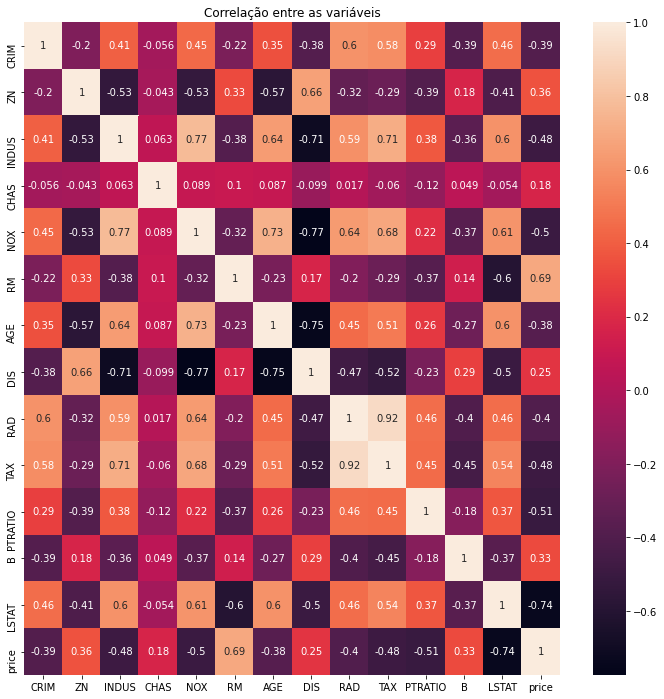

In [18]:
fig = plt.figure(figsize=(12,12))
plt.title("Correlação entre as variáveis")
sns.heatmap(data = df.corr(),annot = True);

Valores acima de 0.7 em módulo indicam forte correlação. Um lembrete importante é que correlação não indica causalidade, ou seja, pode não haver a existência de causa-efeito mesmo quando o valor da correlação é alto.

- Correlação com a variável price:
    - LSTAT: quanto mais pessoas de baixa renda no subúrbio, mais barato será o valor da casa;
    - RM: quanto mais quartos a casa apresentar, maior será seu valor final;
    - PTRATIO: quanto maior a razão aluno-professor no subúrbio, mais barato será o valor da casa;
    - INDUS - quanto mais indústrias no subúrbio, mais barato será o valor da casa;
    - NOX - quanto mais poluição no subúrbio, mais barato será o valor da casa.


- Variáveis que apresentam algum grau de multicolinearidade:
    - TAX-RAD: o imposto parece aumentar quando a casa é localizada próxima a rodovias;
    - DIS-NOX: quanto mais distante dos centros, menor a poluição por óxido nítrico;
    - DIS-AGE: quanto mais distante dos centros, menos antiga é a casa;
    - AGE-NOX: quanto mais antiga a casa, mais concentração de poluição.
    
# REFORMULAR ESTA PARTE
A multicolinearidade aumenta os desvios padrão dos coeficientes da regressão. O aumento dos desvios padrão dos coeficientes, por sua vez, significa que os coeficientes para algumas variáveis podem não ser significativos. Em outras palavras, ao super-inflacionar os desvios padrão, a multicolinearidade torna algumas variáveis estatisticamente insignificantes.

In [19]:
df.corr()['price'].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
NOX       -0.497578
INDUS     -0.483725
TAX       -0.483341
RAD       -0.396006
CRIM      -0.388305
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.691114
price      1.000000
Name: price, dtype: float64

In [20]:
correlations = ['LSTAT', 'PTRATIO', 'INDUS', 'RM', 'ZN', 'B', 'price']

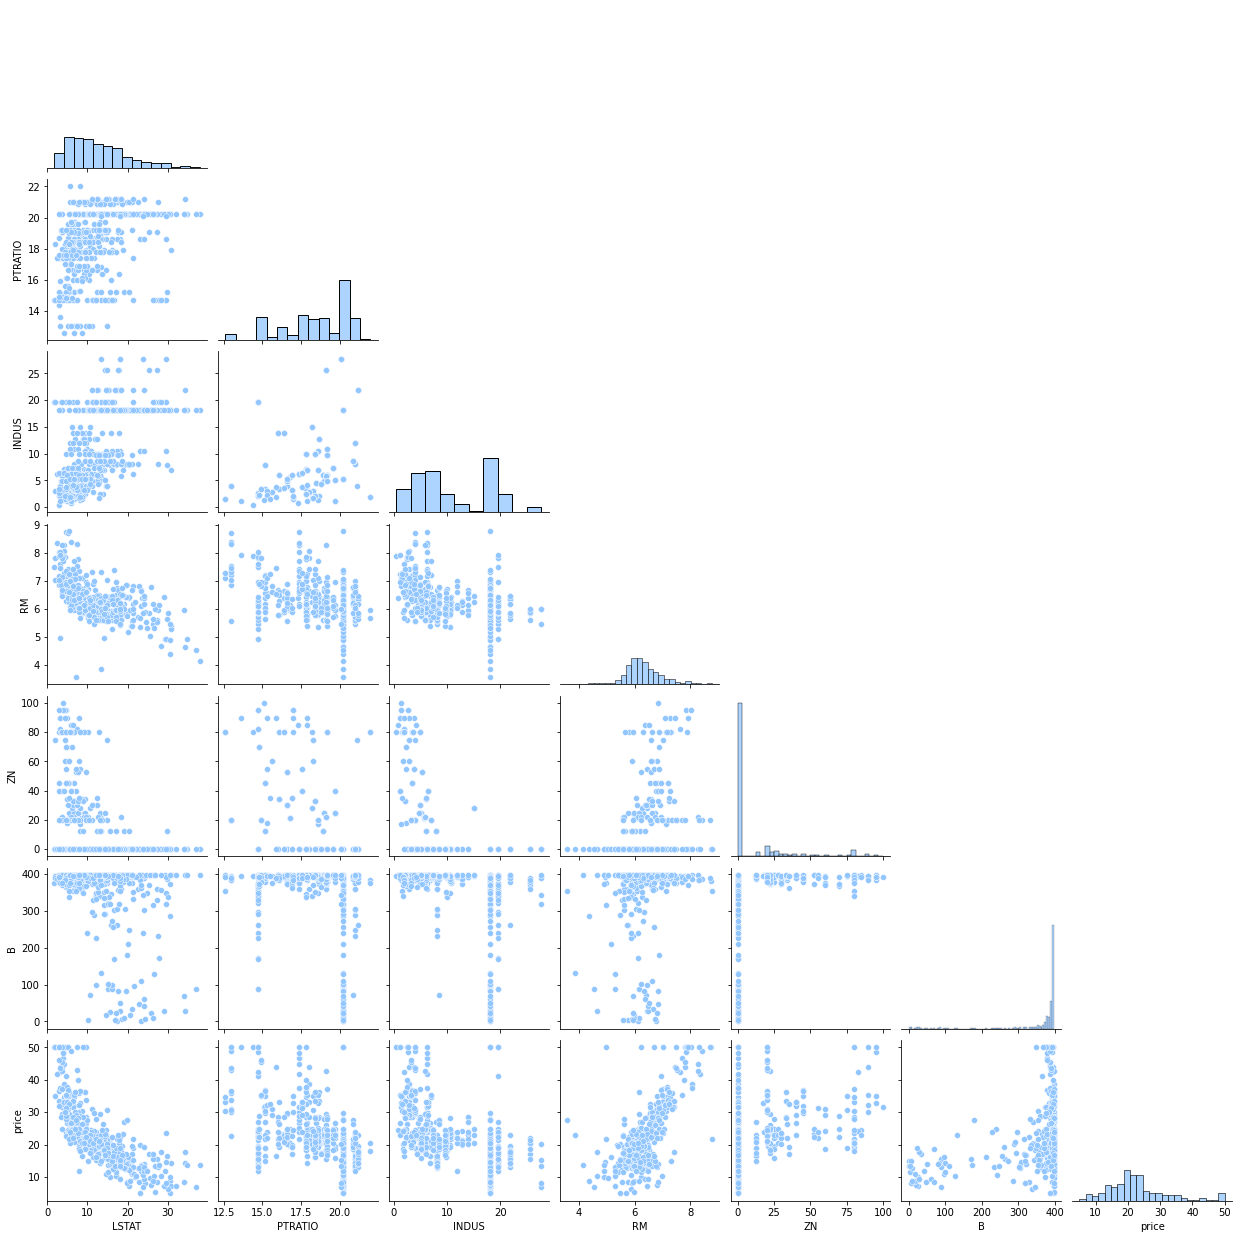

In [21]:
sns.pairplot(df[correlations], corner=True);

 - LSTAT: tem uma correlação alta com price mas ao observar o plot percebe-se que não é linear;
 - PTRATIO e INDUS: apresentam correlação com a variável alvo, mas ocorre uma dispersão dos dados da variável price ao longo das variáveis PTRATIO e INDUS de forma expressiva (heterocedasticidade);
 - ZN e B: conseguimos observar uma correlação com price, porém os dados apresentam uma concentração maior em 0 e 400 respectivamente, aumentando a dispersão nas pontas;
 - RM: variável cuja variação é mais comportada em relação à variável price (homocedasticidade).
 

# Salvando as bases

In [24]:
df.to_csv('data/boston_house_prices_raw.csv', index=None)